# Maximum Likelihood Estimation (MLE)

This regression model produces point estimates based on a likelihood - the probability of observing the data we have. We seek to maximise this likelihood to minimise the residual (error) we make.

#### Assumptions:
* Independence in the observations. If we do this, probability theory tells us that the overall probability is a product of the probabilities of the individual measurements.
* Assume the likelihood is Gaussian. I think it's just easier. 
* We also assume the prior distribution on $\theta$ is uniform. 

#### Theory:
We would like to use the samples from our function to maximise the likelihood for our function $g(x) = \frac{1}{2} + \text{sin}(2\pi X) + \epsilon$. It turns out that the weights we use to maximise the likelihood are obtained by the same method as the least squares regression. Therefore, we can use LSR to compute our weights. We can then compute the residual from the least squares method, using this in our uncertainty quantification:

$$
\sigma^2 = \frac{\|\phi\textbf{w}_{\text{MLE}} - \textbf{y}_{1:n}\|^2}{n},
$$
where $\phi$ are our basis functions and $\textbf{w}$ are our weights. 

In [1]:
import numpy as np
import data_gen
import matplotlib.pyplot as plt

#### Generate Data

Text(0.5, 1.0, 'Raw Observations')

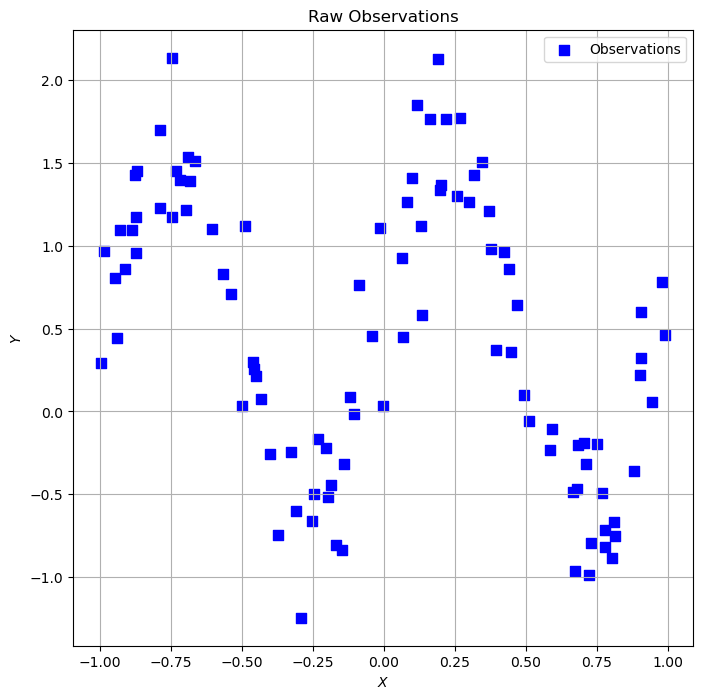

In [29]:
num_observations = 100
sigma = 0.1
X_data = np.random.uniform(-1, 1, num_observations)[:, None]
y_data = data_gen.data(X_data, sigma)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_data, y_data, marker='s', s=50, color="b", label='Observations')
ax.legend()
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.grid(True)
ax.set_title('Raw Observations')

#### Define our basis functions and design matrix

In [24]:
class RBF:
    """
    Radial Basis Function
    """

    def __init__(self, X, ell):
        self.X = X
        self.ell = ell
        self.num_basis = X.shape[0]

    def __call__(self, x):
        return np.exp(-0.5 * (x - self.X) ** 2 / self.ell ** 2).flatten()

def matrixIJ(X, phi):
    """
    Creates a matrix composed of the number of observations I and the number of basis functions J. 
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.zeros((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

In [31]:
# Build design matrix
ell = 0.1
X_c = np.linspace(-1, 1, 10)
phi = RBF(X_c, ell)
Phi = matrixIJ(X_data, phi)

weights, residual, _, _ = np.linalg.lstsq(Phi, y_data, rcond=None)

X_p = np.linspace(-1, 1, num_observations)[:, None]
Phi_p = matrixIJ(X_p, phi)
y_pred = (Phi_p @ weights).flatten()
y_error = np.sqrt(residual/num_observations)
y_lower_bound = y_pred - 2 * y_error
y_upper_bound = y_pred + 2 * y_error

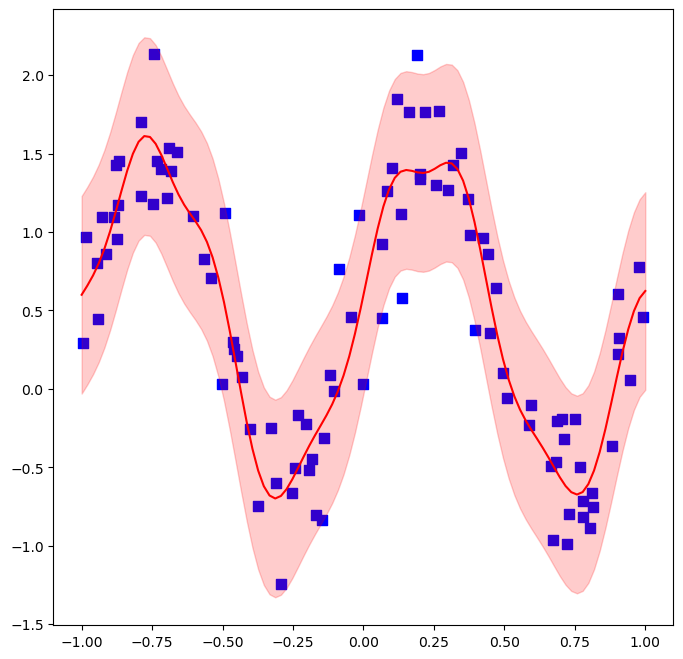

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_data, y_data, marker='s', s=50, color="b", label='Observations')
ax.plot(X_p, y_pred, color='r', label='MLE')
ax.fill_between(X_p.flatten(), y_lower_bound, y_upper_bound, alpha=0.2, color='r', label='Uncertainty')

#### Conclusions
The use of radial basis functions seems a bit overkill for this function. We can see this as there is quite a bit of overfitting to the data, moreover the regression model isn't reaching the peaks and troughs that well. 